In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def print_img(img, label=""):
    # 顯示圖片用
    plt.imshow(img, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(label)
    plt.xlabel("type:{}, shape:{}".format(img.dtype, img.shape))
    plt.show()

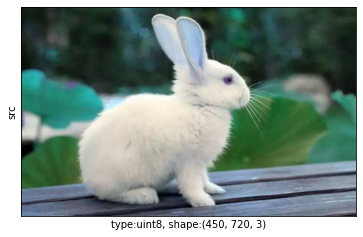

In [3]:
img_src = cv.imread('../image/rbt.jpg')
print_img(img_src, 'src')

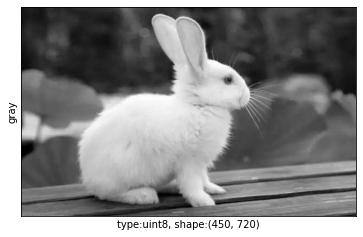

In [4]:
img_gray = cv.cvtColor(img_src, cv.COLOR_RGB2GRAY)
print_img(img_gray, 'gray')

# 圖像二值化

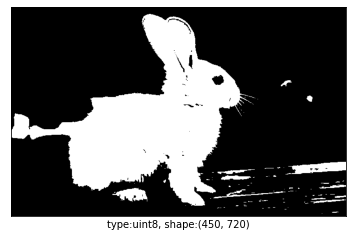

In [64]:
ret, img_bin = cv.threshold(img_gray, 160, 255, cv.THRESH_BINARY)
print_img(img_bin)

# 腐蝕
* 將亮區域區縮小並區隔開來
* 可以消除斑點雜訊

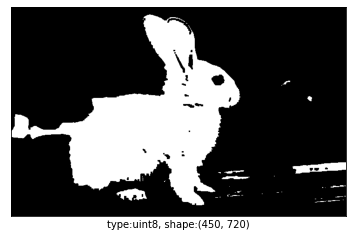

In [65]:
ksize = 3
kernel = np.ones((ksize, ksize), dtype=np.uint8)
print_img(cv.erode(img_bin, kernel, iterations=1))

# 膨脹
* 將亮區域放大盡可能連接
* 可能放大斑點雜訊

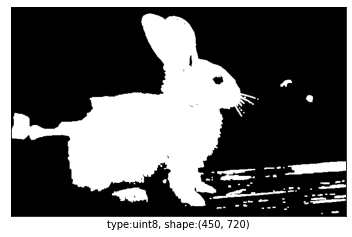

In [66]:
ksize = 3
kernel = np.ones((ksize, ksize), dtype=np.uint8)
print_img(cv.dilate(img_bin, kernel, iterations=1))

# 開運算
* 效果與腐蝕相似但可以更精準的分割區域
* 先腐蝕後膨脹

In [67]:
def mop_open(img, ksize=3, iterations=1):
    kernel = np.ones((ksize, ksize), dtype=np.uint8)
    
    # (腐蝕->腐蝕...) => (膨脹->膨脹...)
    img_erode = cv.erode(img, kernel, iterations=iterations)
    img_dilate = cv.dilate(img_erode, kernel, iterations=iterations)
    return img_dilate

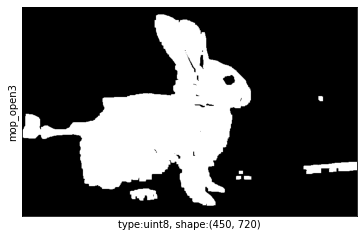

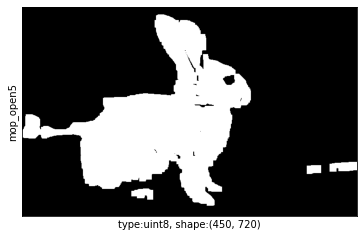

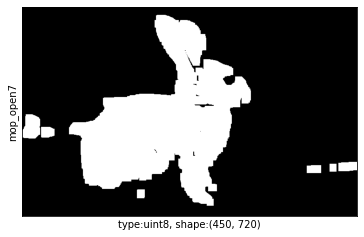

In [68]:
print_img(mop_open(img_bin, 3, 3), 'mop_open3')
print_img(mop_open(img_bin, 3, 5), 'mop_open5')
print_img(mop_open(img_bin, 3, 7), 'mop_open7')

# 閉運算
* 效果與膨脹相似但能保留更多細節
* 先膨脹後腐蝕

In [69]:
def mop_close(img, ksize=3, iterations=1):
    kernel = np.ones((ksize, ksize), dtype=np.uint8)
    
    # (膨脹->膨脹...) => (腐蝕->腐蝕...)
    img_dilate = cv.dilate(img, kernel, iterations=iterations)
    img_erode = cv.erode(img_dilate, kernel, iterations=iterations)
    return img_erode

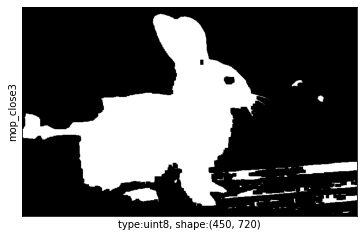

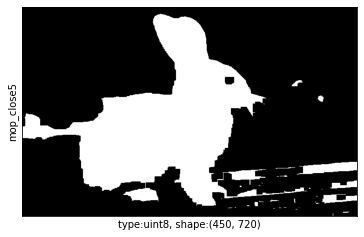

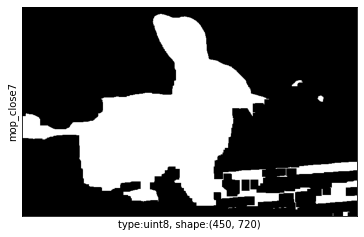

In [70]:
print_img(mop_close(img_bin, 3, 3), 'mop_close3')
print_img(mop_close(img_bin, 3, 5), 'mop_close5')
print_img(mop_close(img_bin, 3, 7), 'mop_close7')

# 開閉普通用法
* 一般會先使用腐蝕或閉運算消除斑點雜訊
* 之後開閉迭代

In [71]:
def mop_open_close(img, ksize=3, iterations=1):
    
    # 消除斑點雜訊
    img_init = mop_close(img, ksize, 1)
    
    # 先開後關
    output = mop_open(img_init, ksize, iterations)
    output = mop_close(output, ksize, iterations)
    return output

def mop_close_open(img, ksize=3, iterations=1):

    # 消除斑點雜訊
    img_init = mop_close(img, ksize, 1)
    
    # 先關後開
    output = mop_close(img_init, ksize, iterations)
    output = mop_open(output, ksize, iterations)

    return output

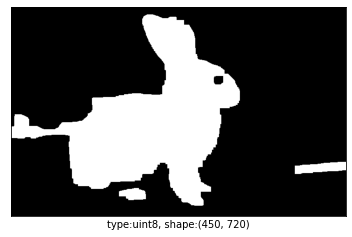

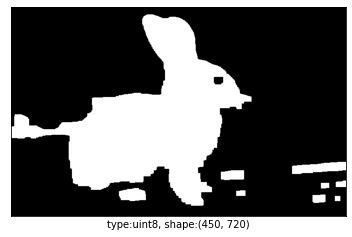

In [72]:
img_open_close = mop_open_close(img_bin, 3, 5)
img_close_open = mop_close_open(img_bin, 3, 5)
print_img(img_open_close)
print_img(img_close_open)